In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# General csv file with results per iteration
df_log = []
df_val = []
df_train = []
list_np_train = []
list_np_val = []
class_names = ['non-damage', 'delamination', 'rebar-exposure']
for i in range(10):
    df_log.append(pd.read_csv('results/cross_validation_10_folds/{}_log.csv'.format(i)))
    df_iu_cls = pd.read_csv('results/cross_validation_10_folds/{}_iu_cls.csv'.format(i), header=None)
    df_iu_cls = df_iu_cls.dropna(axis=1, how='all')
    df_iu_cls = df_iu_cls.drop(axis=1, columns=[0])
    names = ['epoch', 'iter', 'train_iou', 'valid_iou']
    df_iu_cls.columns = names
    
    temp = df_iu_cls[['train_iou','valid_iou', 'epoch']]
       
    df_val.append(pd.DataFrame.from_records(temp['valid_iou'].map(lambda x: x[1:-1].split()).tolist(), columns=class_names).astype('float32'))
    df_train.append(pd.DataFrame.from_records(temp['train_iou'].map(lambda x: x[1:-1].split()).tolist(), columns=class_names).astype('float32'))
 
    list_np_train.append(df_train[i].as_matrix())
    list_np_val.append(df_val[i].as_matrix())
    

In [133]:
np_train = np.array(list_np_train)
np_val = np.array(list_np_val)
np_train_mean = np.mean(np_train, axis=0)
np_val_mean = np.mean(np_val, axis=0)
np_train_std = np.std(np_train, axis=0)
np_val_std = np.std(np_val, axis=0)

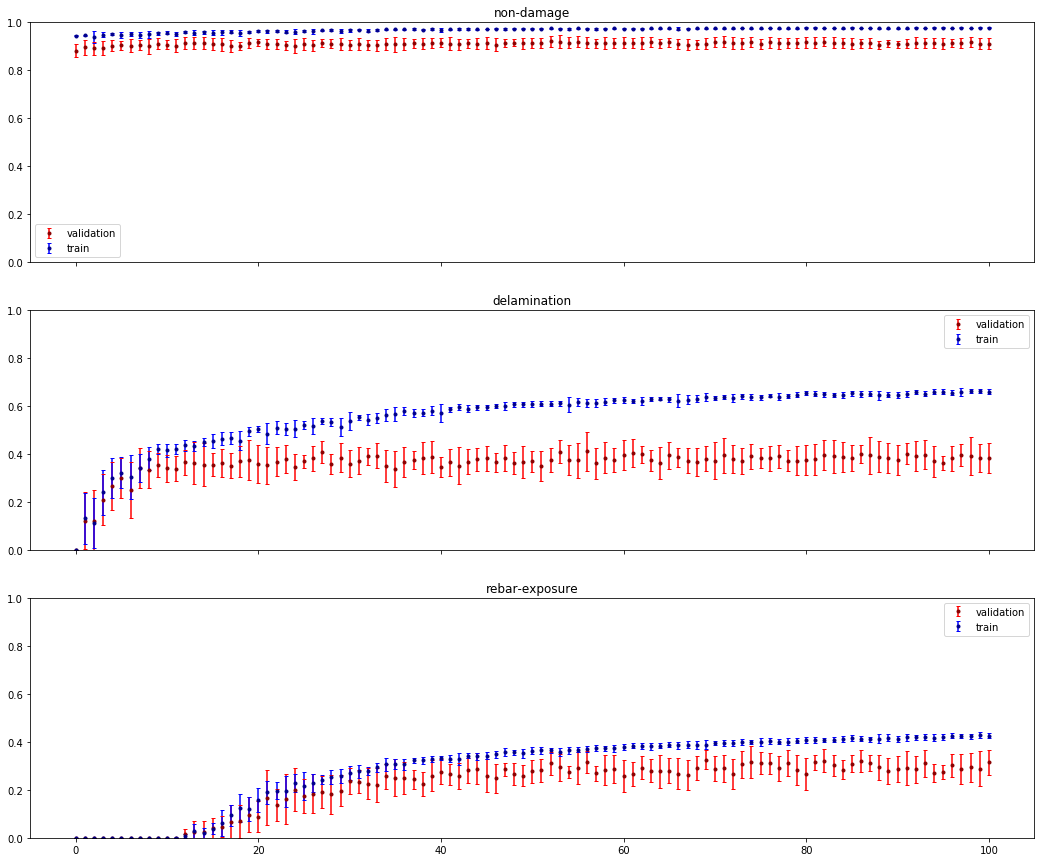

In [134]:
#uses the stdiance for error bars
figure, axarr = plt.subplots(3, sharex=True, figsize=(18, 15))
plots = ['']
for i in range(len(class_names)):   
   axarr[i].errorbar(range(len(np_val_mean[:,i])), np_val_mean[:,i], yerr=np_val_std[:,i], fmt='.', color='darkred', ecolor='red', capsize=2, label='validation')
   axarr[i].errorbar(range(len(np_train_mean[:,i])), np_train_mean[:,i], yerr=np_train_std[:,i], fmt='.', color='darkblue', ecolor='blue', capsize=2, label='train')
   axarr[i].set_title(class_names[i])
   axarr[i].autoscale(False) 
   axarr[i].set_ylim([0,1])
   axarr[i].legend()

plt.show()

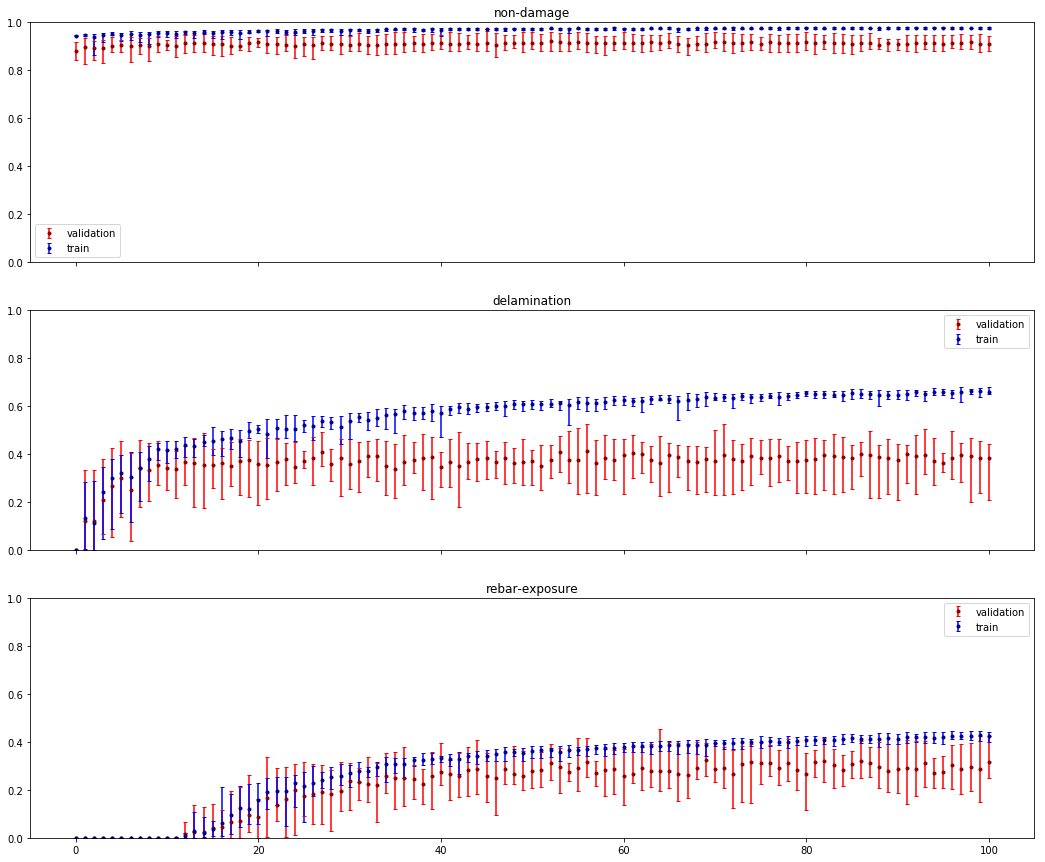

In [129]:
#uses highes/lowest sample for error bar
#uses the stdiance for error bars
np_train_upper = np.max(np_train, axis=0) - np_train_mean
np_train_lower = np_train_mean - np.min(np_train, axis=0)
np_val_upper = np.max(np_val, axis=0) - np_val_mean
np_val_lower = np_val_mean - np.min(np_val, axis=0)
figure, axarr = plt.subplots(3, sharex=True, figsize=(18, 15))
plots = ['']
for i in range(len(class_names)):   
   axarr[i].errorbar(range(len(np_val_mean[:,i])), np_val_mean[:,i], yerr=[np_val_lower[:,i], np_val_upper[:,i]], fmt='.', color='darkred', ecolor='red', capsize=2, label='validation')
   axarr[i].errorbar(range(len(np_train_mean[:,i])), np_train_mean[:,i],yerr=[np_train_lower[:,i], np_train_upper[:,i]], fmt='.', color='darkblue', ecolor='blue', capsize=2, label='train')
   axarr[i].set_title(class_names[i])
   axarr[i].autoscale(False) 
   axarr[i].set_ylim([0,1])
   axarr[i].legend()

plt.show()

In [124]:
np_train_max = np.max(np_train, axis=0)

In [126]:
np_train_max.shape

(101, 3)